#### Below are the actions going to be performed
- Import Dependencies, Framework and Libaries
- Get Image Datum
- Implement input Pipelines and transformations
- Build Model
- Model Evaluation Metrics, Loss and Optimzers
- Train Model
- Evaluate
- Conclusion

In [7]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        pass


### Import Dependencies, Framework and Libaries


In [8]:
!pip install torchmetrics;
!pip install torch;
!pip install torchvision;
!pip install matplotlib;


You should consider upgrading via the '/Users/rmn7591/Documents/Repositories/100-daysOf-Python_challenge/wellness-corner/.venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/rmn7591/Documents/Repositories/100-daysOf-Python_challenge/wellness-corner/.venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/rmn7591/Documents/Repositories/100-daysOf-Python_challenge/wellness-corner/.venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/rmn7591/Documents/Repositories/100-daysOf-Python_challenge/wellness-corner/.venv/bin/python -m pip install --upgrade pip' command.


In [9]:
#Import Libaries
import torch
import torchvision
import matplotlib.pyplot as plt
from torchvision import datasets
from torch.utils.data import Dataset, DataLoader
from torchmetrics import Accuracy, Precision, F1Score
from pathlib import Path
from torch import optim
import torch.nn as nn

In [10]:
#Set up device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [11]:
dir_path = Path('/Users/rmn7591/Documents/Repositories/100-daysOf-Python_challenge/wellness-corner/assistant/yoga_pose_classification/image_dataset/Yoga/Input')

In [12]:
##Transform Data for Trust Sake
from torchvision import transforms
transformer = torchvision.transforms.Compose([
    transforms.Resize(size = (224, 224)),
    transforms.ToTensor(),
])

In [13]:
##Load Image to Dataset
datafolder = torchvision.datasets.ImageFolder(dir_path, transform = transformer)
len(datafolder)

2756

In [14]:
#Split Dataset
import torch.utils.data as data

# Random split
train_set_size = int(len(datafolder) * 0.8)
valid_set_size = len(datafolder) - train_set_size
train_set, valid_set = data.random_split(datafolder, [train_set_size, valid_set_size])

In [15]:
#length of data
len(train_set), len(valid_set)

(2204, 552)

In [16]:
classes = datafolder.classes
classes_len = len(classes)
classes_len, classes


(47,
 ['Adho Mukha Svanasana',
  'Adho Mukha Vrksasana',
  'Alanasana',
  'Anjaneyasana',
  'Ardha Chandrasana',
  'Ardha Matsyendrasana',
  'Ardha Navasana',
  'Ardha Pincha Mayurasana',
  'Ashta Chandrasana',
  'Baddha Konasana',
  'Bakasana',
  'Balasana',
  'Bitilasana',
  'Camatkarasana',
  'Dhanurasana',
  'Eka Pada Rajakapotasana',
  'Garudasana',
  'Halasana',
  'Hanumanasana',
  'Malasana',
  'Marjaryasana',
  'Navasana',
  'Padmasana',
  'Parsva Virabhadrasana',
  'Parsvottanasana',
  'Paschimottanasana',
  'Phalakasana',
  'Pincha Mayurasana',
  'Salamba Bhujangasana',
  'Salamba Sarvangasana',
  'Setu Bandha Sarvangasana',
  'Sivasana',
  'Supta Kapotasana',
  'Trikonasana',
  'Upavistha Konasana',
  'Urdhva Dhanurasana',
  'Urdhva Mukha Svsnssana',
  'Ustrasana',
  'Utkatasana',
  'Uttanasana',
  'Utthita Hasta Padangusthasana',
  'Utthita Parsvakonasana',
  'Vasisthasana',
  'Virabhadrasana One',
  'Virabhadrasana Three',
  'Virabhadrasana Two',
  'Vrksasana'])

In [17]:
# Load a Sample
img, label = train_set[0]

In [18]:
# Sample Details
img.shape, label

(torch.Size([3, 224, 224]), 42)

torch.Size([3, 224, 224])


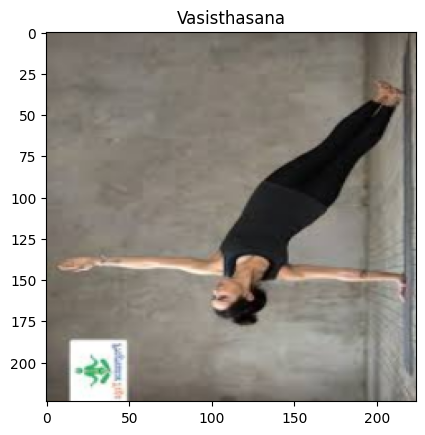

In [19]:
#View Sample Image
import matplotlib.pyplot as plt
img_sample = img.permute(2, 1, 0)
print(img.shape)
plt.imshow(img_sample)
plt.title(classes[label]);

#### Get Model


In [20]:
import torchvision
from torchvision import models
import torchvision.models.efficientnet as e
import torchvision.models.resnet as r

In [21]:
#Load Weights for Training
WEIGHTS = r.resnet50(pretrained= True)
WEIGHTS2 = e.efficientnet_b0(pretrained= True)

/Users/rmn7591/Documents/Repositories/100-daysOf-Python_challenge/wellness-corner/.venv/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/rmn7591/Documents/Repositories/100-daysOf-Python_challenge/wellness-corner/.venv/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/Users/rmn7591/Documents/Repositories/100-daysOf-Python_challenge/wellness-corner/.venv/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are

In [22]:
#View Resnet Details
WEIGHTS.state_dict

<bound method Module.state_dict of ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 2

In [23]:
##Freeze Model Params for Transfer Learning
for p in WEIGHTS.parameters():
    p.requires_grad = False

In [24]:
WEIGHTS.fc = nn.Linear(2048, classes_len)

In [25]:
#View Output Predictor
WEIGHTS.fc

Linear(in_features=2048, out_features=47, bias=True)

In [26]:
model = WEIGHTS
#Take model to device
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

#### Implement DataLoader

In [27]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_loader = DataLoader(dataset =train_set, batch_size =BATCH_SIZE, shuffle = True)
test_loader = DataLoader(dataset= valid_set, batch_size = BATCH_SIZE)

### Evaluation Metrics/ Loss Function / Optimizers


In [30]:
# Set up parameters
loss_fn = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters(), lr= 0.01)
accuracy_fn = Accuracy(task="multiclass", num_classes= 29).to(device)
f1 = F1Score(task="multiclass", num_classes= 29).to(device)

### Training and Evaluation

In [31]:
EPOCHS = 10

train_losses, train_acc = 0, 0

for epoch in range(EPOCHS):
  for batch, (X, y )in enumerate(train_loader):
    X = X.to(device)
    y = y.to(device)
    model.train()

    y_pred =model(X)
    loss = loss_fn(y_pred, y)
    train_acc += accuracy_fn(y_pred.argmax(dim=1), y)
    train_losses += loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 100 == 0:
      print(f'{train_losses} | {train_acc}')

  train_losses /= len(train_loader)
  train_acc /= len(train_loader)
  print(f' Train Loss: {train_losses:.4f} | Train Acc: {train_acc:.3f}')

model.eval()
test_loss, test_acc, test_f1 = 0, 0, 0
with torch.inference_mode():
    for Xt, yt in test_loader:
        Xt = Xt.to(device)
        yt= yt.to(device)
        test_pred = model(X)
        t_loss = loss_fn(test_pred, y)
        test_loss += t_loss
        test_acc += accuracy_fn(test_pred.argmax(dim=1), y)
        test_f1 += f1(test_pred.argmax(dim=1), y)
    test_loss /= len(test_loader)
    test_acc /= len(test_loader)
    test_f1 /= len(test_loader)

    print(f' Test Loss {test_loss:.4f} | Test Acc: {test_acc:.2f} | F1Score: {test_f1}  ')

0.9839300513267517 | 0.78125
 Train Loss: 2.0087 | Train Acc: 0.632
3.2840237617492676 | 1.3508021831512451
 Train Loss: 1.2264 | Train Acc: 0.744
2.284238338470459 | 1.4626410007476807
 Train Loss: 1.0950 | Train Acc: 0.768
1.801237940788269 | 1.58013916015625
 Train Loss: 1.0381 | Train Acc: 0.792
1.4886038303375244 | 1.5415987968444824
 Train Loss: 0.7657 | Train Acc: 0.846
0.892392635345459 | 1.8145909309387207
 Train Loss: 0.7523 | Train Acc: 0.847
1.3552172183990479 | 1.6911535263061523
 Train Loss: 0.7683 | Train Acc: 0.845
1.113531470298767 | 1.7513469457626343
 Train Loss: 0.5811 | Train Acc: 0.872
0.754250168800354 | 1.7779698371887207
 Train Loss: 0.4344 | Train Acc: 0.904
0.8256634473800659 | 1.7790673971176147
 Train Loss: 0.5166 | Train Acc: 0.889
 Test Loss 0.2910 | Test Acc: 0.93 | F1Score: 0.9285714626312256  


### Prediction with stored image

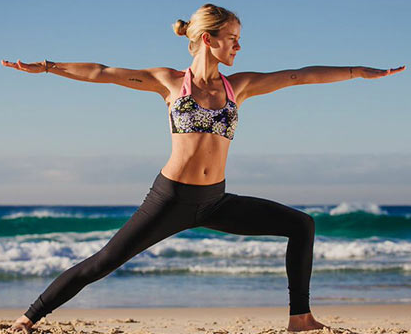

In [32]:
load_path = '/Users/rmn7591/Documents/Repositories/100-daysOf-Python_challenge/wellness-corner/assistant/yoga_pose_classification/image_dataset/Yoga/Input/Virabhadrasana Two/File1.png'
from PIL import Image
img = Image.open(load_path)
img

In [33]:
transformed_img = transformer(img)

In [34]:
transformed_img = transformed_img.unsqueeze(dim=0)
transformed_img.shape

torch.Size([1, 3, 224, 224])

In [35]:
transformed_img.to(device)
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [36]:
transformed_img = transformed_img.to(device)

In [37]:
transformed_img.device

device(type='cpu')

In [38]:
# with torch.inference_mode():
#     transformed_img.to(device)
#     output = model(transformed_img)


# Assuming transformed_img is a 4-channel image (RGBA) and you want to use only RGB channels
rgb_img = transformed_img[:, :3, :, :]  # Extract the first 3 channels (RGB)
rgb_img = rgb_img.to(device)

# Run inference on the RGB image
with torch.inference_mode():
    output = model(rgb_img)


In [39]:
outputp = torch.argmax(output).detach()
outputp =outputp.item()

In [40]:
Predicted_class = classes[outputp]
print(f'Predicted Class is: {Predicted_class} ')

Predicted Class is: Virabhadrasana Two 
